# Nortek AD2CP Processing Code
##### jgradone@marine.rutgers.edu     01/11/2022    Initial

This jupyter notebook was designed to...

In [48]:
# Imports
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import dirname, join as pjoin
import glob
import netCDF4 as nc
import math
import datetime
import cartopy.crs as ccrs
import xarray as xr
from RU29_helpers import grid_glider
import dbdreader
import matplotlib.dates as mdates
import cmocean.cm as cmo


## Set some plotting formats
plt.style.use('seaborn-poster')
myFmtshort = mdates.DateFormatter('%m/%d\n%H:%M')
myFmtlong = mdates.DateFormatter('%m/%d/%y \n%H:%M')
myFmt = mdates.DateFormatter('%m/%d/%y')

## Copied from glider_ADCP_real_time_processing.py 01/11/22

In [3]:
## Set path for where all the data lives
path = '/Users/joegradone/SynologyDrive/Drive/Rutgers/Research/data/Glider/RU_29/Nortek_Recovered/processed/'

files = glob.glob(path+'*.nc')
files = np.sort(files)

In [4]:
# Load some variables

ds = nc.Dataset(files[0])


tm = np.array(ds['Data']['Burst'].variables['time'])
tm = pd.to_datetime(tm, unit='s').values
pressure = np.array(ds['Data']['Burst'].variables['Pressure'])
heading = np.array(ds['Data']['Burst'].variables['Heading'])
pitch = np.array(ds['Data']['Burst'].variables['Pitch'])
roll = np.array(ds['Data']['Burst'].variables['Roll'])
bins = np.array(ds['Data']['Burst'].variables['Velocity Range'])

beam1vel = np.array(ds['Data']['Burst'].variables['VelocityBeam1']).transpose()
beam2vel = np.array(ds['Data']['Burst'].variables['VelocityBeam2']).transpose()
beam3vel = np.array(ds['Data']['Burst'].variables['VelocityBeam3']).transpose()
beam4vel = np.array(ds['Data']['Burst'].variables['VelocityBeam4']).transpose()

beam1cor = np.array(ds['Data']['Burst'].variables['CorrelationBeam1']).transpose()
beam2cor = np.array(ds['Data']['Burst'].variables['CorrelationBeam2']).transpose()
beam3cor = np.array(ds['Data']['Burst'].variables['CorrelationBeam3']).transpose()
beam4cor = np.array(ds['Data']['Burst'].variables['CorrelationBeam4']).transpose()

beam1amp = np.array(ds['Data']['Burst'].variables['AmplitudeBeam1']).transpose()
beam2amp = np.array(ds['Data']['Burst'].variables['AmplitudeBeam2']).transpose()
beam3amp = np.array(ds['Data']['Burst'].variables['AmplitudeBeam3']).transpose()
beam4amp = np.array(ds['Data']['Burst'].variables['AmplitudeBeam4']).transpose()


df = xr.Dataset(
    {"heading" : (("time"),heading),
     "depth" : (("time"),pressure),
     "pitch" : (("time"),pitch),
     "roll" : (("time"),roll),
     
     "beam1vel" : (("bins","time"),beam1vel),
     "beam2vel" : (("bins","time"),beam2vel),
     "beam3vel" : (("bins","time"),beam3vel),
     "beam4vel" : (("bins","time"),beam4vel),
     "beam1cor" : (("bins","time"),beam1cor),
     "beam2cor" : (("bins","time"),beam2cor),
     "beam3cor" : (("bins","time"),beam3cor),
     "beam4cor" : (("bins","time"),beam4cor),
     "beam1amp" : (("bins","time"),beam1amp),
     "beam2amp" : (("bins","time"),beam2amp),
     "beam3amp" : (("bins","time"),beam3amp),
     "beam4amp" : (("bins","time"),beam4amp)},
             coords   = {"bins":bins,"time":tm}
                       )





for x in np.arange(1,len(files)):
    ds = nc.Dataset(files[x])
    
    tm = np.array(ds['Data']['Burst'].variables['time'])
    tm = pd.to_datetime(tm, unit='s').values
    pressure = np.array(ds['Data']['Burst'].variables['Pressure'])
    heading = np.array(ds['Data']['Burst'].variables['Heading'])
    pitch = np.array(ds['Data']['Burst'].variables['Pitch'])
    roll = np.array(ds['Data']['Burst'].variables['Roll'])
    bins = np.array(ds['Data']['Burst'].variables['Velocity Range'])

    beam1vel = np.array(ds['Data']['Burst'].variables['VelocityBeam1']).transpose()
    beam2vel = np.array(ds['Data']['Burst'].variables['VelocityBeam2']).transpose()
    beam3vel = np.array(ds['Data']['Burst'].variables['VelocityBeam3']).transpose()
    beam4vel = np.array(ds['Data']['Burst'].variables['VelocityBeam4']).transpose()

    beam1cor = np.array(ds['Data']['Burst'].variables['CorrelationBeam1']).transpose()
    beam2cor = np.array(ds['Data']['Burst'].variables['CorrelationBeam2']).transpose()
    beam3cor = np.array(ds['Data']['Burst'].variables['CorrelationBeam3']).transpose()
    beam4cor = np.array(ds['Data']['Burst'].variables['CorrelationBeam4']).transpose()

    beam1amp = np.array(ds['Data']['Burst'].variables['AmplitudeBeam1']).transpose()
    beam2amp = np.array(ds['Data']['Burst'].variables['AmplitudeBeam2']).transpose()
    beam3amp = np.array(ds['Data']['Burst'].variables['AmplitudeBeam3']).transpose()
    beam4amp = np.array(ds['Data']['Burst'].variables['AmplitudeBeam4']).transpose()
    
    df2 = xr.Dataset(
    {"heading" : (("time"),heading),
     "depth" : (("time"),pressure),
     "pitch" : (("time"),pitch),
     "roll" : (("time"),roll),
     
     "beam1vel" : (("bins","time"),beam1vel),
     "beam2vel" : (("bins","time"),beam2vel),
     "beam3vel" : (("bins","time"),beam3vel),
     "beam4vel" : (("bins","time"),beam4vel),
     "beam1cor" : (("bins","time"),beam1cor),
     "beam2cor" : (("bins","time"),beam2cor),
     "beam3cor" : (("bins","time"),beam3cor),
     "beam4cor" : (("bins","time"),beam4cor),
     "beam1amp" : (("bins","time"),beam1amp),
     "beam2amp" : (("bins","time"),beam2amp),
     "beam3amp" : (("bins","time"),beam3amp),
     "beam4amp" : (("bins","time"),beam4amp)},
             coords   = {"bins":bins,"time":tm}
                       )
    
    df = xr.merge([df, df2])


In [5]:
df

<xarray.Dataset>
Dimensions:   (bins: 40, time: 1359304)
Coordinates:
  * time      (time) datetime64[ns] 2021-05-25T15:34:39.032099072 ... 2021-07...
  * bins      (bins) float32 0.7 1.2 1.7 2.2 2.7 ... 18.2 18.7 19.2 19.7 20.2
Data variables: (12/16)
    heading   (time) float32 235.8 235.8 235.8 235.8 ... 99.2 99.19 99.19 99.18
    depth     (time) float64 10.05 10.04 10.05 10.06 ... 566.8 566.7 566.7 566.7
    pitch     (time) float32 0.3 0.3 0.3 0.3 0.3 ... 28.16 28.17 28.19 28.21
    roll      (time) float32 171.7 171.7 171.7 171.7 ... 179.4 179.4 179.4 179.4
    beam1vel  (bins, time) float32 0.115 0.126 0.056 ... 0.576 0.147 -0.319
    beam2vel  (bins, time) float32 -0.194 -0.248 -0.172 ... 1.073 0.529 0.605
    ...        ...
    beam3cor  (bins, time) float32 54.0 61.0 52.0 52.0 ... 19.0 1.0 3.0 12.0
    beam4cor  (bins, time) float32 34.0 39.0 44.0 45.0 43.0 ... 3.0 12.0 5.0 5.0
    beam1amp  (bins, time) float32 85.0 85.0 85.0 85.0 ... 33.5 33.0 33.5 33.0
    beam2amp  (bins, time) float32 85.0 85.0 85.0 85.0 ... 33.5 33.5 33.5 33.5
    beam3amp  (bins, time) float32 85.0 85.0 85.0 85.0 ... 34.5 34.5 34.5 34.5
    beam4amp  (bins, time) float32 85.0 85.0 85.0 85.0 ... 33.5 33.5 33.5 33.5

/Users/joegradone/opt/anaconda3/envs/glider/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


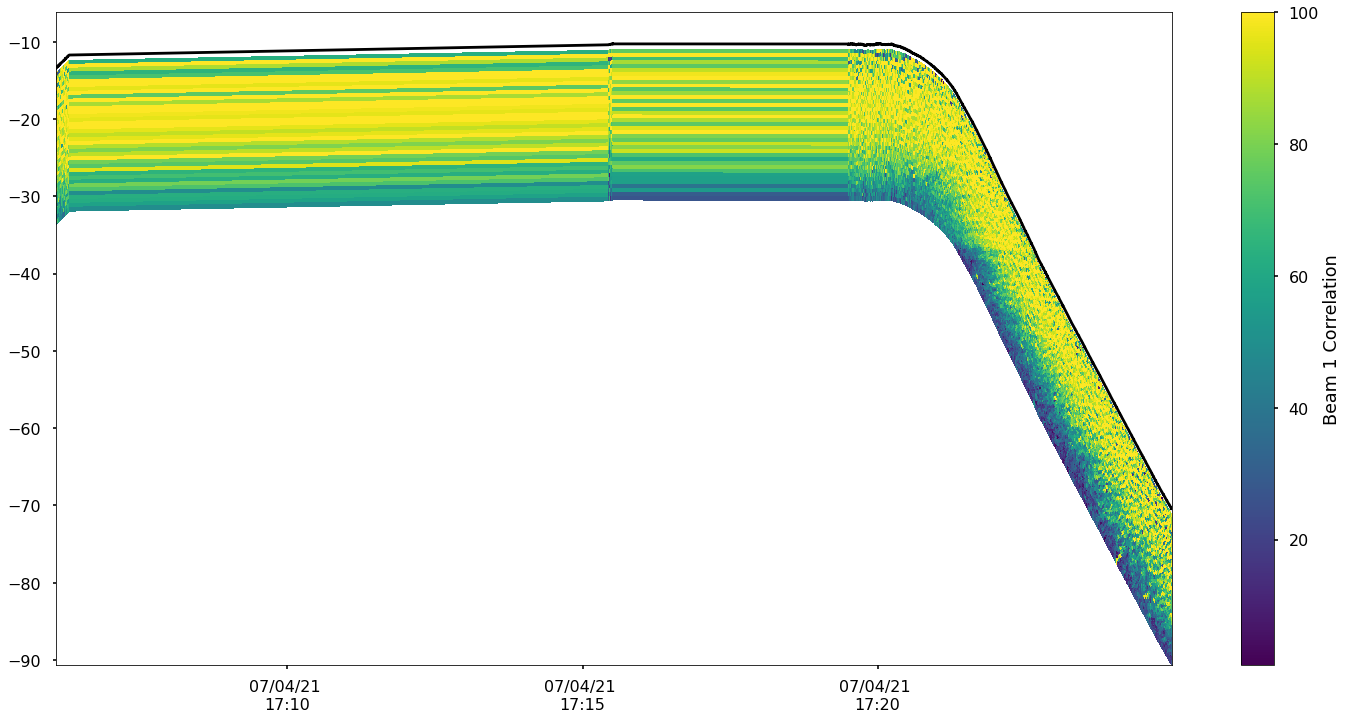

In [50]:
[x,y]=np.meshgrid(df.time,df.bins)
[bdepth,bbins]=np.meshgrid(df.depth,df.bins)

by=bdepth+bbins

fig = plt.figure(figsize=(25,12))

plt.pcolormesh(x[:,1326700:1328000],-by[:,1326700:1328000],df.beam1cor[:,1326700:1328000])
plt.plot(df.time[1326700:1328000],-df.depth[1326700:1328000],'k')
plt.colorbar(label='Beam 1 Correlation')
plt.gca().xaxis.set_major_formatter(myFmtlong)

/Users/joegradone/opt/anaconda3/envs/glider/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


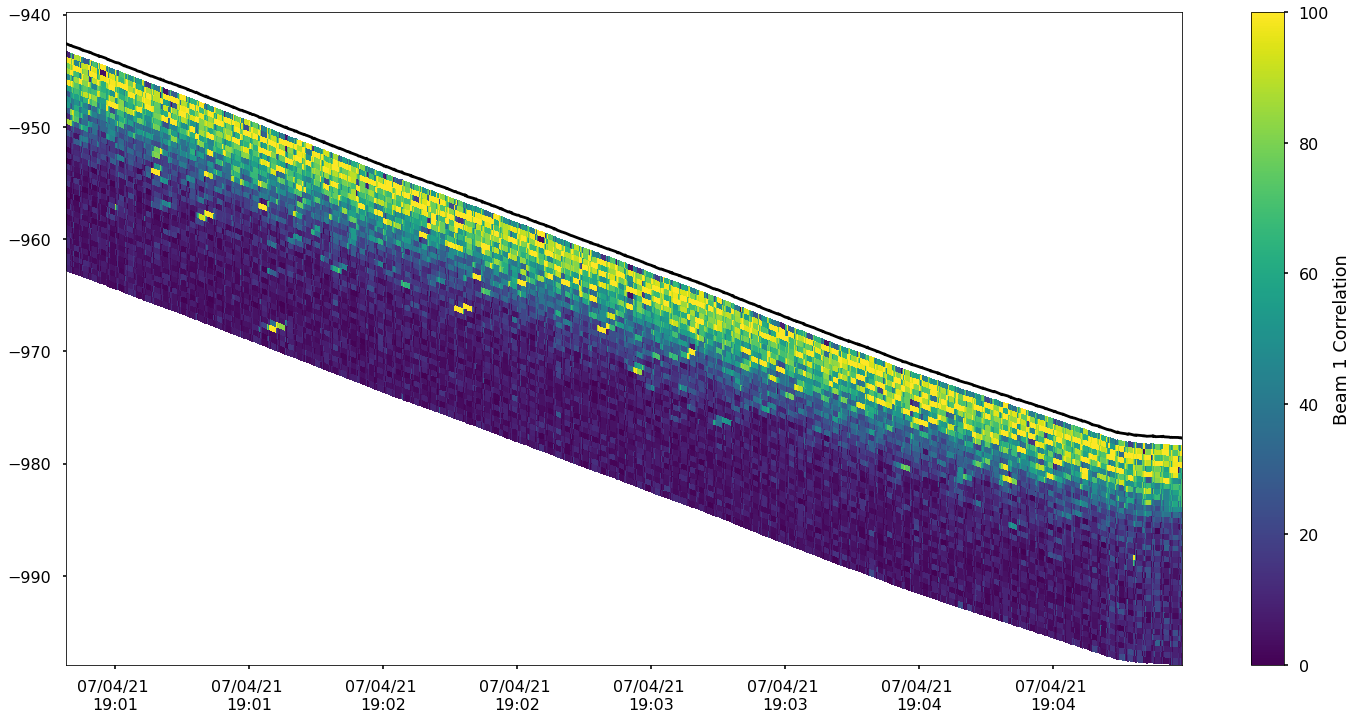

In [63]:
[x,y]=np.meshgrid(df.time,df.bins)
[bdepth,bbins]=np.meshgrid(df.depth,df.bins)

by=bdepth+bbins

fig = plt.figure(figsize=(25,12))

plt.pcolormesh(x[:,1351000:1352000],-by[:,1351000:1352000],df.beam1cor[:,1351000:1352000])
plt.plot(df.time[1351000:1352000],-df.depth[1351000:1352000],'k')
plt.colorbar(label='Beam 1 Correlation')
plt.gca().xaxis.set_major_formatter(myFmtlong)

In [ ]:
# grab bathymetry data for a map

lat_lims = [17.7, 18.8]
lon_lims = [-65.1, -62.8]

# grab some bathymetry

url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/etopo1_bed_g2'

etopo1 = xr.open_dataset(url).sel(lat = slice(lat_lims[0], lat_lims[1]), lon = slice(lon_lims[0], lon_lims[1] ))

fig = plt.figure(figsize=(14,14))
ax = plt.subplot( projection= ccrs.Mercator())

#dpth_contours = np.append(np.arange(-5000, -500, 500), np.arange(-500, 0, 50))
dpth_contours = np.arange(-5000, 0, 500) 

plt.contourf( etopo1.lon, etopo1.lat, etopo1.topo, dpth_contours , 
                 transform=ccrs.PlateCarree(), cmap='Blues_r', zorder=0)
#plt.colorbar()
ax.coastlines()

plt.plot(dr_lon, dr_lat, 'k.', 
         transform=ccrs.PlateCarree())

plt.quiver(dr_lon, dr_lat, Vx,Vy,scale=1,transform=ccrs.PlateCarree(), color='r')

ax.gridlines(draw_labels=True)

In [64]:
ds['Data']['Burst'].variables


{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     units: seconds since 1970-01-01T00:00:00 UTC
     description: time of measurement
     calendar: gregorian
 path = /Data/Burst
 unlimited dimensions: 
 current shape = (135921,)
 filling off,
 'Velocity Range': <class 'netCDF4._netCDF4.Variable'>
 float32 Velocity Range(Velocity Range)
     units: m
     description: 
 path = /Data/Burst
 unlimited dimensions: 
 current shape = (40,)
 filling off,
 'VelocityBeam1': <class 'netCDF4._netCDF4.Variable'>
 float32 VelocityBeam1(time, Velocity Range)
     units: m/s
     description: 
 path = /Data/Burst
 unlimited dimensions: 
 current shape = (135921, 40)
 filling off,
 'VelocityBeam2': <class 'netCDF4._netCDF4.Variable'>
 float32 VelocityBeam2(time, Velocity Range)
     units: m/s
     description: 
 path = /Data/Burst
 unlimited dimensions: 
 current shape = (135921, 40)
 filling off,
 'VelocityBeam3': <class 'netCDF4._netCDF4.Variable'>
 float32 VelocityBeam3(time, V